<a id = 'title'></a>
# GoodReads Dataset EDA

#### Author: Quinci Birker

### Introduction

The last dataset version was completed November 9, 2020.

### Data Dictionary

| Attributes  | Definition | Completeness |
| ------------- | ------------- | ------------- | 
| bookId  | Book Identifier as in goodreads.com  | 100 |
| title  | Book title | 100 |
| series | Series Name | 45 |
| author | Book's Author | 100 |
| rating | Global goodreads rating | 100 |
| description | Book's description | 97 |
| language | Book's language | 93 |
| isbn | Book's ISBN | 92 |
| genres | Book's genres | 91 |
| characters | Main characters | 26 |
| bookFormat | Type of binding | 97 |
| edition | Type of edition (ex. Anniversary Edition) | 9 |
| pages | Number of pages | 96 |
| publisher | Editorial | 93 |
| publishDate | publication date | 98 |
| firstPublishDate | Publication date of first edition | 59 |
| awards | List of awards | 20 |
| numRatings | Number of total ratings | 100 |
| ratingsByStars | Number of ratings by stars | 97 |
| likedPercent | Derived field, percent of ratings over 2 starts (as in GoodReads) | 99 |
| setting | Story setting | 22 |
| coverImg | URL to cover image | 99 |
| bbeScore | Score in Best Books Ever list | 100 |
| bbeVotes | Number of votes in Best Books Ever list | 100 |
| price | Book's price (extracted from Iberlibro) | 73 |

More information on the dataset can be found at https://zenodo.org/records/4265096

### Table of Contents
---------------------------------------
- [Import Dataset and Libraries](#import)
---------------------------------------
- [Preliminary Data Exploration](#pre_explore)
---------------------------------------
- [Data Cleaning](#data_clean)
---------------------------------------
- [Descriptive Statistics](#desc_statistics)
---------------------------------------
- [Data Visualization](#data_visualization)
---------------------------------------
- [Correlation Analysis](#correlation_analysis)
---------------------------------------
- [Summary & Insights](#summary)
---------------------------------------


<a id = 'import'></a>
### Import Dataset and Libraries

In [1]:
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# read data from the CSV file:
raw_df = pd.read_csv('data/books_1.Best_Books_Ever.csv')

<a id = 'pre_explore'></a>
### Preliminary Data Exploration

In [3]:
# check number of rows and columns:
raw_df.shape
print(f'There are {raw_df.shape[0]} rows and {raw_df.shape[1]} columns in the data')

There are 52478 rows and 25 columns in the data


In [4]:
# check the data types for every column:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

The majority of these columns are objects. Columns that might need to change from object to integer:
- publish date
- pages
- first publish date
- price

In [5]:
# sanity check the first five rows:
raw_df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [6]:
# check last 5 rows:
raw_df.tail()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
52473,11492014-fractured,Fractured,Fateful #2,Cheri Schmidt (Goodreads Author),4.00,The Fateful Trilogy continues with Fractured. ...,English,2940012616562,"['Vampires', 'Paranormal', 'Young Adult', 'Rom...",[],...,NaN,[],871,"['311', '310', '197', '42', '11']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52474,11836711-anasazi,Anasazi,Sense of Truth #2,Emma Michaels,4.19,"'Anasazi', sequel to 'The Thirteenth Chime' by...",English,9999999999999,"['Mystery', 'Young Adult']",[],...,August 3rd 2011,[],37,"['16', '14', '5', '2', '0']",95.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,NaN
52475,10815662-marked,Marked,Soul Guardians #1,Kim Richardson (Goodreads Author),3.70,--READERS FAVORITE AWARDS WINNER 2011--Sixteen...,English,9781461017097,"['Fantasy', 'Young Adult', 'Paranormal', 'Ange...",[],...,March 15th 2011,"[""Readers' Favorite Book Award (2011)""]",6674,"['2109', '1868', '1660', '647', '390']",84.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,7.37
52476,11330278-wayward-son,Wayward Son,NaN,"Tom Pollack (Goodreads Author), John Loftus (G...",3.85,A POWERFUL TREMOR UNEARTHS AN ANCIENT SECRETBu...,English,9781450755634,"['Fiction', 'Mystery', 'Historical Fiction', '...",[],...,April 5th 2011,[],238,"['77', '78', '59', '19', '5']",90.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,2.86
52477,10991547-daughter-of-helaman,Daughter of Helaman,Stripling Warrior #1,Misty Moncur (Goodreads Author),4.02,Fighting in Helaman's army is Keturah's deepes...,English,9781599554976,"['Lds Fiction', 'Historical Fiction', 'Young A...",[],...,NaN,[],246,"['106', '73', '42', '17', '8']",90.0,[],https://i.gr-assets.com/images/S/compressed.ph...,0,1,5.20


In [7]:
raw_df.sample(5)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
20089,16288214-chasing-after-infinity,Chasing After Infinity,NaN,L. Jayne,3.51,"As quick as a flash, he puts me up against the...",English,B00AL0J2K8,"['Young Adult', 'High School', 'Romance', 'New...",[],...,01/18/12,[],843,"['208', '240', '227', '108', '60']",80.0,[],https://i.gr-assets.com/images/S/compressed.ph...,100,1,NaN
26914,965343.Old_Filth,Old Filth,Old Filth #1,Jane Gardam,3.94,Sir Edward Feathers has progressed from strugg...,English,9780349118406,"['Fiction', 'Historical Fiction', 'British Lit...",[],...,10/30/04,['Orange Prize Nominee for Fiction Shortlist (...,14335,"['4110', '6226', '3159', '670', '170']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,97,1,1.46
8681,4052117-what-i-saw-and-how-i-lied,What I Saw and How I Lied,NaN,Judy Blundell,3.52,When Evie's father returned home from World Wa...,English,9780439903462,"['Young Adult', 'Historical Fiction', 'Mystery...","['Evie Spooner', 'Peter Coleridge', 'Joe Spoon...",...,NaN,"[""National Book Award for Young People's Liter...",13555,"['2337', '4649', '4661', '1512', '396']",86.0,['United States of America'],https://i.gr-assets.com/images/S/compressed.ph...,289,4,3.26
27247,17286692-beasts,Beasts: What Animals Can Teach Us About the Or...,NaN,Jeffrey Moussaieff Masson,3.44,"In his previous bestsellers, Masson has showed...",English,9781608196159,"['Animals', 'Nonfiction', 'Science', 'Philosop...",[],...,10/15/13,[],281,"['56', '86', '78', '47', '14']",78.0,[],https://i.gr-assets.com/images/S/compressed.ph...,97,1,5.22
48351,12733425,কাকাবাবু সমগ্র ১,সন্তু-কাকাবাবু #1-6,Sunil Gangopadhyay,4.18,This is a collection of 6 early stories in the...,Bengali,9788172152086,"['Adventure', 'Thriller', 'Detective', 'Myster...","['JoJo', 'Shontu', 'Raja Roy Chowdhury-Kakababu']",...,06/06/93,[],1391,"['611', '506', '215', '34', '25']",96.0,[],https://i.gr-assets.com/images/S/compressed.ph...,50,1,20.89


Notes from looking at the begining, end, and a random sample of the dataset:

1. Columns to be deleted that are not useful for this project:
    - `bookId` does not seem to be useful for my project. The index will be used instead of this.  
    - `isbn` is a numeric book identifier. I will also delete this since I am using the index to refer to each unique book in the dataset.
    - `coverImg` is a url to the books cover image. For this project, I will not be using this in my modeling.  
2. There are quite a few columns that are missing data. Further analysis will be performed.

3. Columns that stand out for further investigation:
    - `firstPublishDate` ~ missing values and different formats (i.e. 07/29/96, 1989, April 5th 2011)
    - `price` ~ the values don't seem to be accurate. The entire column might need to be deleted

In [8]:
# Check that total index matches total number of rows:
raw_df.index.nunique() == raw_df.shape[0]

True

The total index count is equal to the total number of rows in the dataset. 

In [9]:
# Count the number of missing values for each column:
raw_df.isna().sum()

bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

In [10]:
# Percentage of missing values for each column:
print(raw_df.isna().sum(axis=0)/raw_df.shape[0])

bookId              0.000000
title               0.000000
series              0.552765
author              0.000000
rating              0.000000
description         0.025496
language            0.072526
isbn                0.000000
genres              0.000000
characters          0.000000
bookFormat          0.028069
edition             0.905579
pages               0.044724
publisher           0.070430
publishDate         0.016769
firstPublishDate    0.406380
awards              0.000000
numRatings          0.000000
ratingsByStars      0.000000
likedPercent        0.011853
setting             0.000000
coverImg            0.011529
bbeScore            0.000000
bbeVotes            0.000000
price               0.273734
dtype: float64


There are 12 columns that have missing values. The column name and rounded percent of missing values in descending order:
- edition: 91%
- series: 55%
- first publish date: 41%
- price 27%
- language: 7%
- publisher: 7%
- pages: 4%
- description: 3%
- book format: 3%
- publish date: 2%
- liked percent: 1%
- cover image: 1%

The first step in the data cleaning process is to delete all the columns that I will not be using for modeling:
- bookid: using dataset index instead
- isbn: using dataset index instead
- cover image: won't be used for this modeling (maybe in future projects)
- edition: over 91% of the values are missing
- first publish date: over 41% missing and my assumption is that publish date will be more relevant than first publish date
- price: the prices do not seem accurate enough to use. Second, depending on the date of purchase and retailer, the price of books can very greatly
- awards: there is limited values in this dataset, around 80% missing
- characters: there is limited values in this dataset, around 74% missing
- setting: there is limited values in this dataset, around 55% missing. Second, a ton of the books have unique settings and this would be a lot to go through

# Come back to this!!

In [11]:
# Check for empty lists in the 'genres' column
empty_lists_mask = raw_df['genres'].apply(lambda x: len(x) == 0)

# Identify rows with empty lists
rows_with_empty_lists = raw_df[empty_lists_mask]

# Display the result
print(rows_with_empty_lists)

Empty DataFrame
Columns: [bookId, title, series, author, rating, description, language, isbn, genres, characters, bookFormat, edition, pages, publisher, publishDate, firstPublishDate, awards, numRatings, ratingsByStars, likedPercent, setting, coverImg, bbeScore, bbeVotes, price]
Index: []

[0 rows x 25 columns]


In [12]:
# Check for duplicated columns:
raw_df.T.duplicated().sum()

0

There are no duplicated columns

In [13]:
# Checking for duplicate rows: 
raw_df[raw_df.duplicated()]

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
37431,8794263-promises-to-keep,Promises to Keep,NaN,Ann Tatlock,3.94,Eleven-year-old Roz (Rosalind) Anthony and her...,English,9780764208096,"['Fiction', 'Christian Fiction', 'Christian', ...",[],...,01/01/11,[],1997,"['582', '833', '476', '84', '22']",95.0,['Illinois (United States)'],https://i.gr-assets.com/images/S/compressed.ph...,87,1,4.23
37432,1909590.Click,Click,NaN,"Eoin Colfer, Linda Sue Park, Ruth Ozeki (Goodr...",3.54,A video message from a dead person. A larcenou...,English,9781407105918,"['Young Adult', 'Fiction', 'Short Stories', 'M...",[],...,11/06/07,['Deutscher Jugendliteraturpreis Nominee for J...,1910,"['340', '647', '664', '214', '45']",86.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,2.60
37433,23394408-die-unendlichkeit-schl-ft,Die Unendlichkeit schläft,Loki von Schallern Staffel 1 #3,Melanie Meier,4.50,"Überall, wo er hingeht, reißen Höllenfeuer all...",German,B00O84Q7UG,[],[],...,NaN,[],2,[],NaN,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,NaN
37434,7544945-death-note,"Death Note: Black Edition, Vol. 2",Death Note: Black Edition #2,"Tsugumi Ohba, Takeshi Obata, Yuki Kowalsky (tr...",4.48,Intégrale regroupant les tomes 3 et 4Tome 3 :L...,German,9783867196727,"['Graphic Novels', 'Comics', 'Fantasy', 'Manga...","['Light Yagami', 'Ryuk']",...,11/06/03,[],5849,"['3339', '2045', '408', '44', '13']",99.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,12.00
37435,25886017-m-scaras,Máscaras,NaN,Ariel Dorfman,3.49,"¿Qué se oculta detrás de esos rostros difusos,...",Spanish,9500704919,"['Fiction', 'Literature']",[],...,01/01/88,[],77,"['17', '22', '23', '12', '3']",81.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,6.16
37436,2669775-el-siglo-de-las-luces,El siglo de las luces,NaN,Alejo Carpentier,4.13,El siglo de las luces novela el impacto de la ...,Spanish,9788402067074,"['Fiction', 'Spanish Literature', 'Historical ...",[],...,11/06/62,[],2282,"['979', '802', '368', '95', '38']",94.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,0.90
37437,24633605-always-and-forever,Always and Forever,Serenity Point #2,Harper Bentley (Goodreads Author),3.93,Does wanting to slap the hell out of Brody Kel...,English,9999999999999,"['Contemporary Romance', 'Romance', 'Firefight...",[],...,NaN,[],482,"['153', '188', '104', '26', '11']",92.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,NaN
37438,237086.Dafne_desvanecida,Dafne desvanecida,NaN,José Carlos Somoza,3.48,Dafne desvanecida presenta a un famoso escrito...,Spanish,9788423331970,"['Fiction', 'Mystery', 'Contemporary', 'Spanis...",[],...,NaN,['Premio Nadal Nominee (2000)'],204,"['37', '56', '82', '25', '4']",86.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,4.90
37439,17786377,فضولية العلم,NaN,"Cyril Aydon, أحمد مغربي (ترجمة)",3.87,"ما يلفت في كتاب سيرل أيدون ""فضولية العلم"" طريق...",Arabic,9781855166752,"['Science', 'Nonfiction']",[],...,10/01/05,[],91,"['25', '37', '21', '8', '0']",91.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,NaN
37440,7452583-jag-vill-inte-d-jag-vill-bara-inte-leva,"Jag vill inte dö, jag vill bara inte leva",NaN,Ann Heberlein,3.50,"Ann Heberleins omdiskuterade självbiografi""Jag...",Swedish,9789172321717,"['Nonfiction', 'Psychology', 'Biography', 'Men...",[],...,12/03/08,[],1032,"['153', '389', '338', '128', '24']",85.0,[],https://i.gr-assets.com/images/S/compressed.ph...,87,1,NaN


These duplicated rows have all the same bbeScore and bbeVotes, yet all the book titles are unique, meaning that these rows will not be dropped.

Check the for description statistics for the number of ratings columns. If some books don't have any or very limited amounts of ratings, this might not be helpful for the modeling. 

In [14]:
raw_df[['numRatings', 'bbeVotes']].describe()

,numRatings,bbeVotes
count,5.247800e+04,52478.000000
mean,1.787865e+04,22.529003
std,1.039448e+05,369.158541
min,0.000000e+00,-4.000000
25%,3.410000e+02,1.000000
50%,2.307000e+03,1.000000
75%,9.380500e+03,2.000000
max,7.048471e+06,30516.000000


`numRatings` has a mean number of around 17,879, meaning that most books in this dataset have a lot people who have rated the book. There are some books that have zero ratings. In the data cleaning below, I will look into dropping rows that have low to no ratings since these would not give an accurate rating score. 

`bbeVotes` has a mean number of around 28 votes per book. The minimum number of votes is negative 4 which does not make sense and will need further investigating. 

<a id = 'data_clean'></a>
### Data Cleaning

Dropping the columns that will not be used in the analysis/modeling.

In [15]:
# Drop the original index (`bookId`)
raw_df.reset_index(drop=True, inplace=True)
raw_df.drop('bookId', axis=1, inplace=True)

In [16]:
# Drop specified column and check that changes have been made to raw_df:

raw_df = raw_df.drop(['isbn', 'coverImg', 'edition', 'firstPublishDate', 'price', 'awards', 'setting', 'characters'], axis=1)
raw_df.head(1)

,title,series,author,rating,description,language,genres,bookFormat,pages,publisher,publishDate,numRatings,ratingsByStars,likedPercent,bbeScore,bbeVotes
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Hardcover,374,Scholastic Press,09/14/08,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,2993816,30516


Dealing with numRatings column:

In [17]:
raw_df.loc[raw_df['numRatings'] < 100].count()

title             8048
series            1554
author            8048
rating            8048
description       7243
language          6575
genres            8048
bookFormat        7534
pages             6949
publisher         6774
publishDate       7699
numRatings        8048
ratingsByStars    8048
likedPercent      7426
bbeScore          8048
bbeVotes          8048
dtype: int64

There are 8,048 books in this dataset that have less than 100 reviews. I will be dropping these rows since I want a enough reviews so that the rating is significant. 

In [18]:
# Drop rows that have less than 100 reviews:
raw_df = raw_df.drop(raw_df[raw_df['numRatings'] < 200].index)

# Confirm new size:
raw_df.shape

(41759, 16)

In [19]:
# Review percentage of missing values for each column after dropping 8,048 books:
print(raw_df.isna().sum(axis=0)/raw_df.shape[0])

title             0.000000
series            0.497234
author            0.000000
rating            0.000000
description       0.010177
language          0.048397
genres            0.000000
bookFormat        0.019828
pages             0.024785
publisher         0.050959
publishDate       0.010752
numRatings        0.000000
ratingsByStars    0.000000
likedPercent      0.000000
bbeScore          0.000000
bbeVotes          0.000000
dtype: float64


After removing the rows with lower number of ratings, the missing values in the columns above have decreased. 

In [20]:
raw_df.loc[raw_df['bbeVotes']< 15].count()

title             38778
series            19423
author            38778
rating            38778
description       38370
language          36810
genres            38778
bookFormat        37957
pages             37756
publisher         36711
publishDate       38333
numRatings        38778
ratingsByStars    38778
likedPercent      38778
bbeScore          38778
bbeVotes          38778
dtype: int64

There are 38,778 books in this dataset that have less than 15 votes, some of these being negative. I do not believe that this column will be a good fit for the modeling so I will be dropping this column.

In [21]:
raw_df = raw_df.drop(['bbeVotes'], axis=1)

In [22]:
raw_df.head(1)

,title,series,author,rating,description,language,genres,bookFormat,pages,publisher,publishDate,numRatings,ratingsByStars,likedPercent,bbeScore
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Hardcover,374,Scholastic Press,09/14/08,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,2993816


For the publish date, the first 30,000 books in the dataset are formatted in mm/dd/yyyy while the last 22,478 books are formated in Month Day Year. I will reformate all the dates to be in mm/dd/yyyy.

Reformatting the publish date column and setting the datatype to a numeric value:

In [23]:
# Change publish date to datetime format:
raw_df['publishDate'] = pd.to_datetime(raw_df['publishDate'], errors='coerce') # errors='coerce' used if value cannot be converted to datetime format
# Reformat publish date to mm/dd/yyyy format:
raw_df['publishDate'] = raw_df['publishDate'].dt.strftime('%m/%d/%Y')
raw_df['publishDate'] = raw_df['publishDate'].astype('datetime64[ns]')

# Confirm changes were updated:
raw_df.sample(5)

/var/folders/b1/ck799gjn11b_0zbx9y3pynvr0000gn/T/ipykernel_9477/1085856217.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_df['publishDate'] = pd.to_datetime(raw_df['publishDate'], errors='coerce') # errors='coerce' used if value cannot be converted to datetime format


,title,series,author,rating,description,language,genres,bookFormat,pages,publisher,publishDate,numRatings,ratingsByStars,likedPercent,bbeScore
39175,Мастер и Маргарита. Собачье сердце,NaN,Mikhail Bulgakov,4.71,Михаил Булгаков - уникальное явление в русской...,Russian,"['Russia', 'Classics', 'Fiction', 'Fantasy', '...",NaN,NaN,NaN,NaT,2399,"['1916', '331', '108', '29', '15']",98.0,84
10265,Steel,NaN,Carrie Vaughn (Goodreads Author),3.42,"It was a slender length of rusted steel, taper...",English,"['Fantasy', 'Young Adult', 'Time Travel', 'His...",Hardcover,291,HarperTeen,2011-03-15,5864,"['1102', '1618', '2043', '861', '240']",81.0,244
9810,The Passion,Dark Visions #3,L.J. Smith (Goodreads Author),4.04,Betrayed!Kaitlyn Fairchild and her four psychi...,English,"['Young Adult', 'Paranormal', 'Fantasy', 'Roma...",Paperback,211,Simon Pulse,1995-04-01,3181,"['1245', '1044', '698', '155', '39']",94.0,260
9420,This Is How You Lose the Time War,NaN,"Amal El-Mohtar (Goodreads Author), Max Gladsto...",3.96,"Among the ashes of a dying world, an agent of ...",English,"['Science Fiction', 'Fiction', 'Romance', 'LGB...",Kindle Edition,209,Saga Press,2019-07-16,33840,"['12656', '11257', '6592', '2516', '819']",90.0,272
12955,The FitzOsbornes in Exile,The Montmaray Journals #2,Michelle Cooper (Goodreads Author),4.05,"Forced to leave their island kingdom, Sophie F...",English,"['Historical Fiction', 'Young Adult', 'Histori...",Paperback,451,Random House Australia,2010-08-02,2863,"['937', '1308', '495', '80', '43']",96.0,188


In [24]:
# Check the changes were updated:
raw_df['publishDate'].info()

<class 'pandas.core.series.Series'>
Index: 41759 entries, 0 to 52477
Series name: publishDate
Non-Null Count  Dtype         
--------------  -----         
40822 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 652.5 KB


The pages column is missing just over 2 percent of it's values. This isn't a significant amount so I will be replacing the values with the mean number of pages.

In [25]:
# Convert pages column into a numeric value
raw_df['pages'] = pd.to_numeric(raw_df['pages'], errors='coerce')
# Mean number of pages
mean_pages = raw_df['pages'].mean()
# Fill all empty values with the mean number of pages
raw_df['pages'].fillna(mean_pages, inplace=True)
# Convert 'pages' to integer type
raw_df['pages'] = raw_df['pages'].astype(int)

#Confirm changes:
raw_df['pages'].info()

<class 'pandas.core.series.Series'>
Index: 41759 entries, 0 to 52477
Series name: pages
Non-Null Count  Dtype
--------------  -----
41759 non-null  int64
dtypes: int64(1)
memory usage: 652.5 KB


# COME BACK TO THIS:

Looking at series which is missing 50% of it's values.

In [26]:
raw_df.loc[raw_df['series'].isna()]

,title,series,author,rating,description,language,genres,bookFormat,pages,publisher,publishDate,numRatings,ratingsByStars,likedPercent,bbeScore
3,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",Paperback,279,Modern Library,2000-10-10,2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,1983116
5,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,"['Historical Fiction', 'Fiction', 'Young Adult...",Hardcover,552,Alfred A. Knopf,2006-03-14,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,1372809
6,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",Mass Market Paperback,141,Signet Classics,1996-04-28,2740713,"['986764', '958699', '545475', '165093', '84682']",91.0,1276599
9,Gone with the Wind,NaN,Margaret Mitchell,4.30,"Scarlett O'Hara, the beautiful, spoiled daught...",English,"['Classics', 'Historical Fiction', 'Fiction', ...",Mass Market Paperback,1037,Warner Books,1999-04-01,1074620,"['602138', '275517', '133535', '39008', '24422']",94.0,1087732
10,The Fault in Our Stars,NaN,John Green (Goodreads Author),4.21,Despite the tumor-shrinking medical miracle th...,English,"['Young Adult', 'Romance', 'Fiction', 'Contemp...",Hardcover,313,Dutton Books,2012-01-10,3550714,"['1784471', '1022406', '512574', '150365', '80...",93.0,1087056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52463,The Natural Way of Things,NaN,Charlotte Wood,3.53,Two women awaken from a drugged sleep to find ...,English,"['Fiction', 'Dystopia', 'Australia', 'Feminism...",Paperback,320,Allen & Unwin,2015-10-01,10894,"['2044', '3961', '3098', '1269', '522']",84.0,1
52464,Algedonic,NaN,R.H. Sin (Goodreads Author),3.71,"Bestselling poet r.h. Sin, author of the Whisk...",NaN,"['Poetry', 'Nonfiction', 'Romance', 'Feminism']",Paperback,128,Andrews McMeel Publishing,2017-12-12,1489,"['501', '402', '339', '144', '103']",83.0,1
52469,Heal Your Body: The Mental Causes for Physical...,NaN,Louise L. Hay,4.36,Heal Your Body is a fresh and easy step-by-ste...,English,"['Self Help', 'Health', 'Nonfiction', 'Spiritu...",Paperback,96,Hay House,1984-01-01,14868,"['8640', '3745', '1864', '418', '201']",96.0,1
52470,Attracted to Fire,NaN,DiAnn Mills (Goodreads Author),4.14,Special Agent Meghan Connors' dream of one day...,English,"['Christian Fiction', 'Christian', 'Suspense',...",Paperback,416,Tyndale House Publishers,2011-10-01,2143,"['945', '716', '365', '78', '39']",95.0,0


In order to use the series in the modeling, I will add a column:

- Book is in a series: value = 1
- Book is not in a series: value = 0

In [27]:
# Fills all NaN values with 0 and then any values that are not 0 are now 1
raw_df['series_bool'] = raw_df['series'].fillna(0).apply(lambda x: 1 if x != 0 else 0)

# Confirm tha these changes were made:
raw_df.head()

,title,series,author,rating,description,language,genres,bookFormat,pages,publisher,publishDate,numRatings,ratingsByStars,likedPercent,bbeScore,series_bool
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",Hardcover,374,Scholastic Press,2008-09-14,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,2993816,1
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",Paperback,870,Scholastic Inc.,2004-09-28,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,2632233,1
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",Paperback,324,Harper Perennial Modern Classics,2006-05-23,4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,2269402,1
3,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",Paperback,279,Modern Library,2000-10-10,2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,1983116,0
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",Paperback,501,"Little, Brown and Company",2006-09-06,4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,1459448,1


Language column has around 5 percent missing values. 

In [28]:
# Look at the rows where the values for the language column are missing:
raw_df.loc[raw_df['language'].isna()]

,title,series,author,rating,description,language,genres,bookFormat,pages,publisher,publishDate,numRatings,ratingsByStars,likedPercent,bbeScore,series_bool
503,Mistress Suffragette,NaN,Diana Forbes (Goodreads Author),4.34,\n A young woman without prospects at a ball ...,NaN,"['Fiction', 'Novels', 'Historical Fiction', 'D...",Kindle Edition,333,Penmore Press LLC,2017-03-05,7647,"['3553', '3422', '466', '140', '66']",97.0,18215,0
570,Invisible Monsters,NaN,Chuck Palahniuk (Goodreads Author),3.98,She's a catwalk model who has everything: a bo...,NaN,"['Fiction', 'Contemporary', 'Thriller', 'Myste...",Paperback,304,W. W. Norton Company,2018-05-01,128254,"['47150', '45163', '25392', '7675', '2874']",92.0,15186,0
645,House of Sand and Fog,NaN,Andre Dubus III,3.85,In this “page-turner with a beating heart” (Bo...,NaN,"['Fiction', 'Contemporary', 'Literary Fiction'...",Paperback,368,W. W. Norton Company,2018-10-02,125230,"['38141', '46256', '28560', '8447', '3826']",90.0,12262,0
703,The Awakening: Fate in Motion,NaN,Suzanne Boisvert (Goodreads Author),4.31,"Exiled from Earth thousands of years ago, Sar ...",NaN,"['Contemporary', 'Drama', 'Book Club', 'Fictio...",Kindle Edition,331,NaN,2018-09-15,6682,"['3045', '3031', '329', '206', '71']",96.0,10611,0
751,"One Fish, Two Fish, Red Fish, Blue Fish",NaN,Dr. Seuss (Reader),4.13,One Fish Two Fish Red Fish Blue Fish is a 1960...,NaN,"['Childrens', 'Picture Books', 'Fiction', 'Cla...",Hardcover,64,Harper Collins Children's Books,2003-10-06,165623,"['81438', '41473', '30307', '8407', '3998']",93.0,9731,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52384,Find Me,"Shatter Me #4.5, 5.5",Tahereh Mafi,4.16,Calling all fans of Tahereh Mafi’s New York Ti...,NaN,"['Dystopia', 'Fantasy', 'Young Adult', 'Romanc...",Paperback,224,HarperCollins,2019-10-08,1600,"['672', '586', '288', '34', '20']",97.0,3,1
52390,The Apprentice's Quest,Warriors: A Vision of Shadows #1,Erin Hunter,4.41,Erin Hunter’s #1 bestselling Warriors series c...,NaN,"['Fantasy', 'Animals', 'Middle Grade', 'Fictio...",ebook,352,HarperCollins,2016-03-15,4394,"['2754', '952', '504', '122', '62']",96.0,3,1
52411,Pixie Dust,Pixie Dust Chronicles #1,Laura Lee (Goodreads Author),3.79,*A lonesome fairy with no clue how to wield he...,NaN,"['Fantasy', 'Paranormal', 'Paranormal Romance'...",ebook,342,Laura Lee,2011-12-31,1373,"['460', '424', '299', '115', '75']",86.0,2,1
52416,When I Fall,Alabama Summer #3,J. Daniels (Goodreads Author),4.30,"From New York Times bestselling author, J. Dan...",NaN,"['Romance', 'New Adult', 'Contemporary Romance...",NaN,343,NaN,2015-03-17,12022,"['5939', '4225', '1488', '256', '114']",97.0,2,1


For book format and description, I will replace the empty values with 'unknown'. These columns have a low percent of missing values, both being under 2 percent, therefore, this should not have a huge impact on the data. 

The publisher column is only missing around 5 percent so I will do the same with this column.

In [29]:
raw_df['description'].fillna('unknown', inplace=True)
raw_df['bookFormat'].fillna('unknown', inplace=True)
raw_df['publisher'].fillna('unknown', inplace=True)

Last step before moving onto descriptive statistics, check that the empty values have all been dealt with:

In [30]:
# Percentage of missing values for each column:
print(raw_df.isna().sum(axis=0)/raw_df.shape[0])

title             0.000000
series            0.497234
author            0.000000
rating            0.000000
description       0.000000
language          0.048397
genres            0.000000
bookFormat        0.000000
pages             0.000000
publisher         0.000000
publishDate       0.022438
numRatings        0.000000
ratingsByStars    0.000000
likedPercent      0.000000
bbeScore          0.000000
series_bool       0.000000
dtype: float64


In [31]:
df = raw_df.copy()

<a id = 'desc_statistics'></a>
### Descriptive Statistics

Compute the basic statistics of all the numeric columns:

In [32]:
df.describe()

,rating,pages,publishDate,numRatings,likedPercent,bbeScore,series_bool
count,41759.000000,41759.000000,40822,4.175900e+04,41759.000000,4.175900e+04,41759.000000
mean,3.999511,342.801456,2006-04-16 19:57:20.556562560,2.245263e+04,92.384085,2.465221e+03,0.502766
min,1.920000,0.000000,1873-01-01 00:00:00,2.000000e+02,19.000000,0.000000e+00,0.000000
25%,3.820000,231.000000,2002-07-01 00:00:00,1.273000e+03,90.000000,8.400000e+01,0.000000
50%,4.010000,320.000000,2008-01-01 00:00:00,4.083000e+03,94.000000,9.800000e+01,1.000000
75%,4.190000,400.000000,2012-11-01 00:00:00,1.300050e+04,96.000000,2.180000e+02,1.000000
max,4.980000,14777.000000,2072-03-01 00:00:00,7.048471e+06,100.000000,2.993816e+06,1.000000
std,0.279363,249.676914,NaN,1.160842e+05,4.910011,3.939302e+04,0.499998


<a id = 'data_visualization'></a>
### Data Visualization

In [33]:
categorical = list(df.select_dtypes(include='object').columns)
                   
numeric = list(df.select_dtypes(exclude='object').columns)

<a id = 'correlation_analysis'></a>
### Correlation Analysis

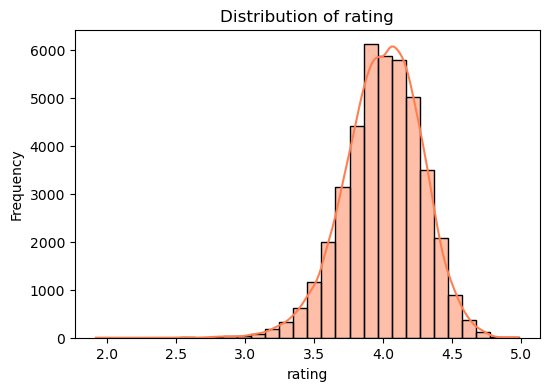

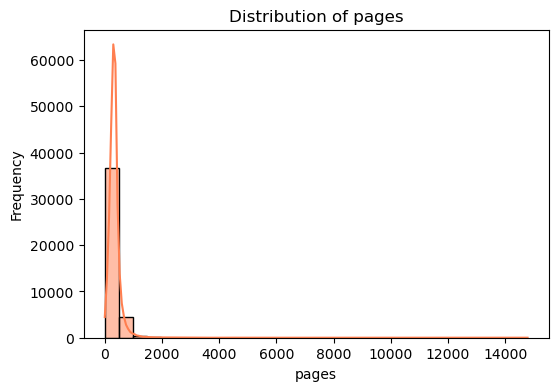

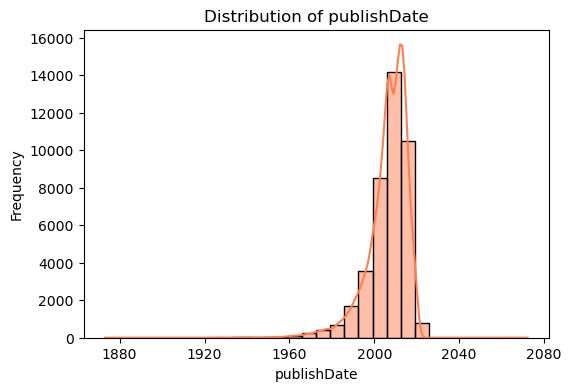

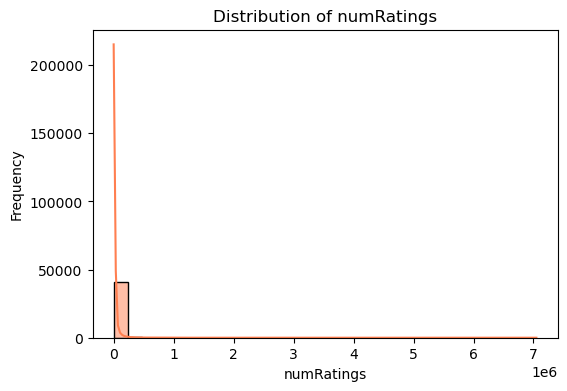

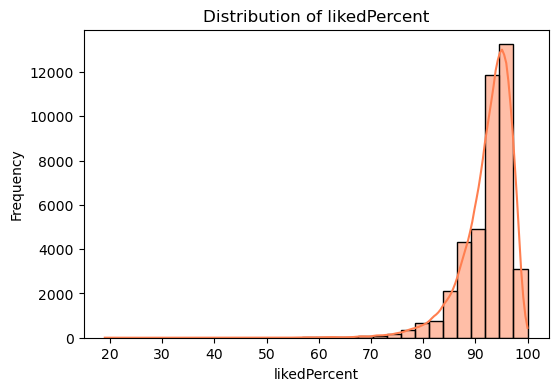

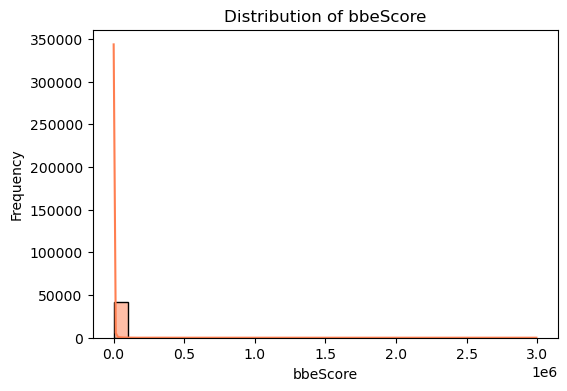

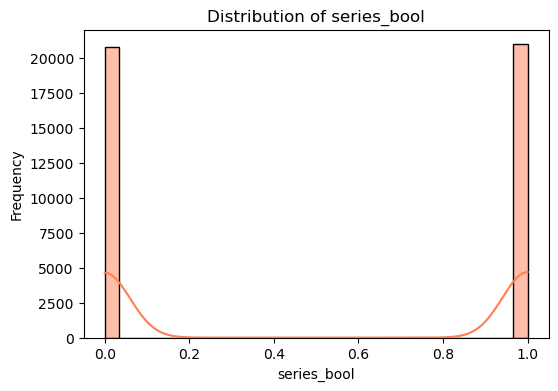

In [34]:
for col in df.columns:
    # Check if the column is numeric
    if df[col].dtype in ['int64', 'float64', 'datetime64[ns]']:
        # Resize
        plt.figure(figsize=(6, 4))
        
        # Create histplot
        sns.histplot(df[col], kde=True, bins=30, color='coral')
        
        # Add labels: 
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
        
        plt.show()

<a id = 'summary'></a>
### Summary & Insights

[Back to the top](#title)